# Introduction to Matplotlib and Seaborn



## Introduction to Matplotlib

Matplotlib is a data visualization package built on numpy arrays for making 2D plots. It makes extensive use of numpy arrays and other extension code to provide good performance even for large arrays.

The package is fairly old, with version 0.1 released in 2003. The main advantage of this package is that it allows for flexible visualization in Python across versions and operating systems.

It is important to note the hierarchy: Name of library is Matplotlib whereas the name of the module is matplotlib.pyplot

Anatomy of a figure:

![alt text](https://pbs.twimg.com/media/Cr5jxB-UkAAmvBn?format=jpg&name=medium)


### Basic plots in Matplotlib:

- Line Plot
- Scatter plot
- Pie charts
- Histograms
- Bar charts
- Paths
- Three dimensional plotting
- Images

### Getting Started

Since we are using Jupyter notebook, we start our notebook with this line:

In [5]:
%matplotlib inline

This ensures that our visualizations will render in the notebook itself.

We now load the matplotlib library:

In [42]:
import pandas as pd
#pip3 install matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv('data_property_tax_report_2018.csv')
original = df.copy()
# without copy, point original to the memory adress of df
df.head(2)

#backup process:
#df = original.copy()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,NaN,592000,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,T OF THE STRATA LOT AS SHOWN ON FOR,715000,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13


In [43]:
df.columns

Index(['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],
      dtype='object')

In [44]:
df.dtypes

PID                            object
LEGAL_TYPE                     object
FOLIO                         float64
LAND_COORDINATE                 int64
ZONE_NAME                      object
ZONE_CATEGORY                  object
LOT                            object
BLOCK                          object
PLAN                           object
DISTRICT_LOT                   object
FROM_CIVIC_NUMBER              object
TO_CIVIC_NUMBER               float64
STREET_NAME                    object
PROPERTY_POSTAL_CODE           object
NARRATIVE_LEGAL_LINE1          object
NARRATIVE_LEGAL_LINE2          object
NARRATIVE_LEGAL_LINE3          object
NARRATIVE_LEGAL_LINE4          object
NARRATIVE_LEGAL_LINE5          object
CURRENT_LAND_VALUE              int64
CURRENT_IMPROVEMENT_VALUE       int64
TAX_ASSESSMENT_YEAR             int64
PREVIOUS_LAND_VALUE           float64
PREVIOUS_IMPROVEMENT_VALUE    float64
YEAR_BUILT                    float64
BIG_IMPROVEMENT_YEAR          float64
TAX_LEVY    

In [45]:
df.PROPERTY_POSTAL_CODE.isnull().sum()

3801

In [46]:
len(df)

205346

In [47]:
df.PROPERTY_POSTAL_CODE.isnull().sum() / len(df) * 100

1.8510221772033546

In [48]:
df[df.PROPERTY_POSTAL_CODE.isnull()][['PROPERTY_POSTAL_CODE','STREET_NAME']]

,PROPERTY_POSTAL_CODE,STREET_NAME
29,NaN,VACANT
30,NaN,39TH AVE E
777,NaN,NaN
1086,NaN,FRASER ST
1414,NaN,SKEENA ST
...,...,...
205327,NaN,PIERVIEW CRES
205333,NaN,KING EDWARD AVE E
205336,NaN,FIR ST
205341,NaN,QUEBEC ST


In [49]:
#df['PROPERTY_POSTAL_CODE']
#df.PROPERTY_POSTAL_CODE
df = df[ df.PROPERTY_POSTAL_CODE.notnull() ]


In [50]:
df.PROPERTY_POSTAL_CODE.isnull().sum()

0

In [51]:
len(df)

201545

In [52]:
df = df[ df.YEAR_BUILT.notnull() ]

In [53]:
len(df)

193975

In [54]:
df = df[['PID', 'YEAR_BUILT']].groupby('YEAR_BUILT', as_index=False).count()

In [55]:
#<funnybrackets>
df = df.rename(columns={'PID':'NO_OF_PROPS'})
df.head()

,YEAR_BUILT,NO_OF_PROPS
0,1800.0,33
1,1886.0,1
2,1890.0,1
3,1893.0,1
4,1898.0,4


In [56]:
df.tail()

,YEAR_BUILT,NO_OF_PROPS
117,2011.0,3441
118,2012.0,3414
119,2013.0,3872
120,2014.0,3227
121,2015.0,17


In [58]:
%matplotlib inline
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
#x1,y1 = (1,4)
#x2,y2 = (2,8)
#x = [1, 4]
#y = [2, 8]

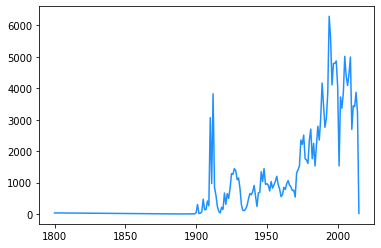

In [59]:
plt.figure()
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
plt.plot(x, y, 'dodgerblue')
plt.show()

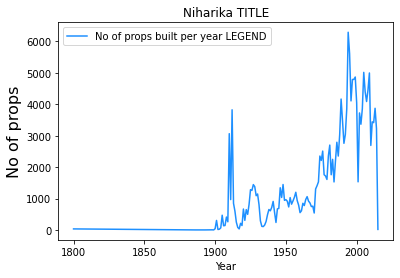

In [69]:
#plt.figure(figsize=(17,6))
plt.figure()
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
plt.plot(x, y, 'dodgerblue', label = 'No of props built per year LEGEND')
plt.legend()
plt.title('Niharika TITLE')
plt.xlabel('Year')
plt.ylabel('No of props', fontsize=16)
plt.savefig('pixelgraph.png', dpi = 400)
plt.show()

In [70]:
!ls *.png

pixelgraph.png


In [71]:
!open pixelgraph.png
# or for windows users:
!start pixelgraph.png

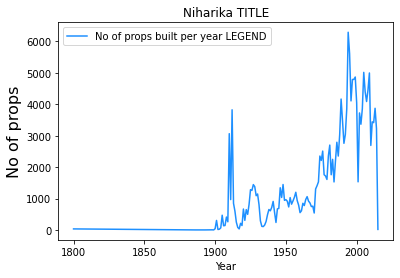

In [72]:
#plt.figure(figsize=(17,6))
plt.figure()
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
plt.plot(x, y, 'dodgerblue', label = 'No of props built per year LEGEND')
plt.legend()
plt.title('Niharika TITLE')
plt.xlabel('Year')
plt.ylabel('No of props', fontsize=16)
plt.savefig('vectorgraph.svg', dpi = 400)
plt.show()

In [73]:
!open vectorgraph.svg

In [74]:
df = df[(df.YEAR_BUILT>=1900) & (df.YEAR_BUILT<=2000)]

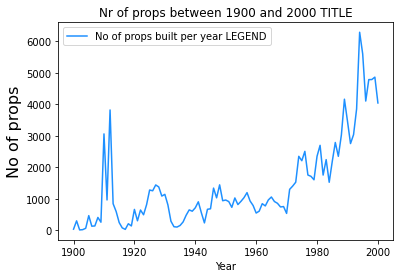

In [75]:
plt.figure()
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
plt.plot(x, y, 'dodgerblue', label = 'No of props built per year LEGEND')
plt.legend()
plt.title('Nr of props between 1900 and 2000 TITLE')
plt.xlabel('Year')
plt.ylabel('No of props', fontsize=16)
#plt.savefig('vectorgraph.svg', dpi = 400)
plt.show()

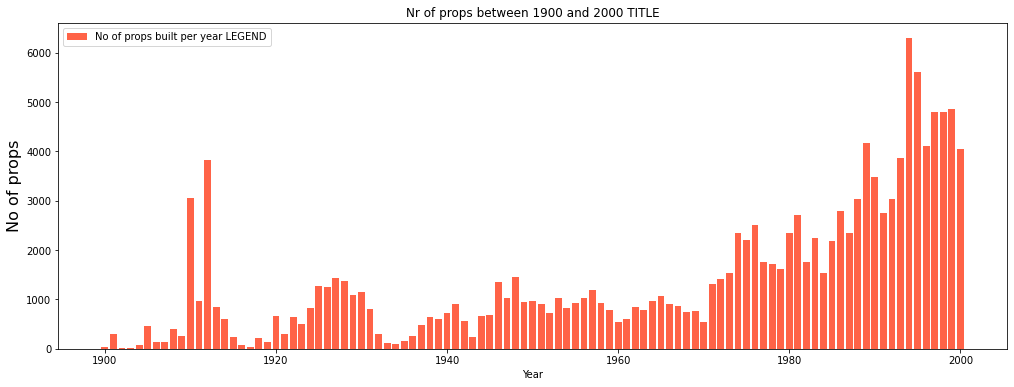

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize=(17,6))
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
#no plt.plot but plt.bar
plt.bar(x, y,  color='tomato',label = 'No of props built per year LEGEND')
plt.legend()
plt.title('Nr of props between 1900 and 2000 TITLE')
plt.xlabel('Year')
plt.ylabel('No of props', fontsize=16)
plt.show()
plt.clf()

In [92]:
df = original.copy()
df.ZONE_CATEGORY.unique()

array(['Commercial', 'Comprehensive Development', 'Light Industrial',
       'Multiple Family Dwelling', 'One Family Dwelling',
       'Two Family Dwelling', 'Limited Agricultural', nan, 'Industrial',
       'Historic Area'], dtype=object)

In [93]:
df = df.groupby('ZONE_CATEGORY', as_index=False)['PID'].count()

In [94]:
df = df.rename(columns={'PID':'NO_OF_PROPS'})
df

,ZONE_CATEGORY,NO_OF_PROPS
0,Commercial,17869
1,Comprehensive Development,67550
2,Historic Area,2457
3,Industrial,1239
4,Light Industrial,3297
5,Limited Agricultural,163
6,Multiple Family Dwelling,27305
7,One Family Dwelling,68344
8,Two Family Dwelling,14750


In [95]:
df['PERC_OF_PROP'] = df.NO_OF_PROPS / df.NO_OF_PROPS.sum()
df

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
0,Commercial,17869,0.088036
1,Comprehensive Development,67550,0.332801
2,Historic Area,2457,0.012105
3,Industrial,1239,0.006104
4,Light Industrial,3297,0.016243
5,Limited Agricultural,163,0.000803
6,Multiple Family Dwelling,27305,0.134525
7,One Family Dwelling,68344,0.336713
8,Two Family Dwelling,14750,0.072669


In [96]:
df['PERC_OF_PROP'] = df['PERC_OF_PROP'].multiply(100)
df

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
0,Commercial,17869,8.803591
1,Comprehensive Development,67550,33.280125
2,Historic Area,2457,1.210500
3,Industrial,1239,0.610423
4,Light Industrial,3297,1.624346
5,Limited Agricultural,163,0.080306
6,Multiple Family Dwelling,27305,13.452462
7,One Family Dwelling,68344,33.671308
8,Two Family Dwelling,14750,7.266941


In [99]:
df_top5 = df.nlargest(columns='PERC_OF_PROP', n=5)
df_top5

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
7,One Family Dwelling,68344,33.671308
1,Comprehensive Development,67550,33.280125
6,Multiple Family Dwelling,27305,13.452462
0,Commercial,17869,8.803591
8,Two Family Dwelling,14750,7.266941


Text(0.5, 1.0, 'Lukas piechart')

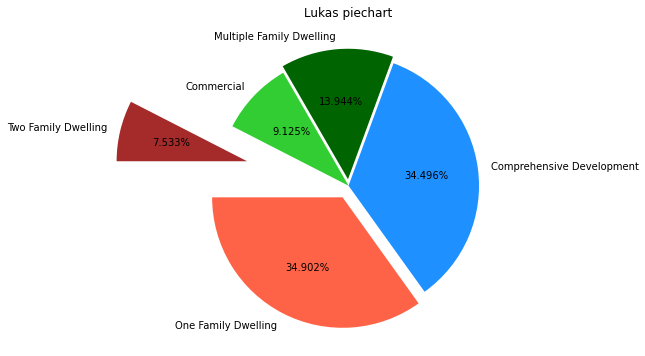

In [131]:
plt.figure(figsize=(17,6))
#plt.[plot|bar|pie]
plt.pie(df_top5.PERC_OF_PROP, 
        labels=df_top5.ZONE_CATEGORY,
        colors=['tomato', 'dodgerblue', 'darkgreen', 'limegreen', 'brown'],
        autopct='%1.3f%%',
        startangle=180,
        explode=(0.1,0,0.05,0,0.8)
       )
plt.title('Lukas piechart')

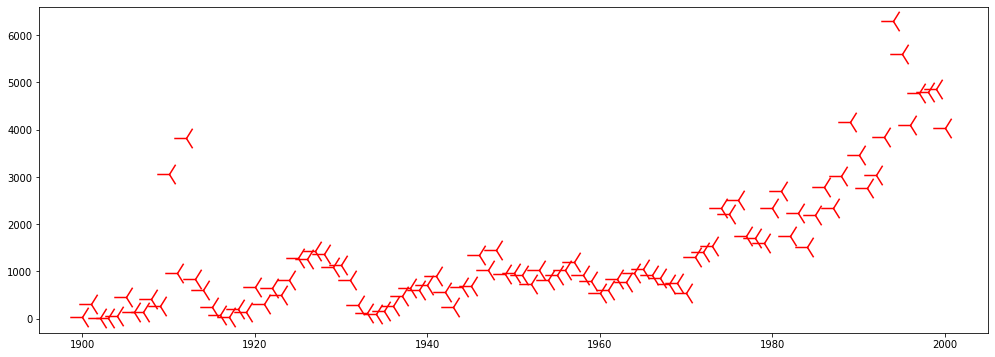

In [143]:
plt.figure(figsize=(17,6))
plt.scatter(x, y, label='label', s = 600, edgecolor='black', color='red', marker='3')

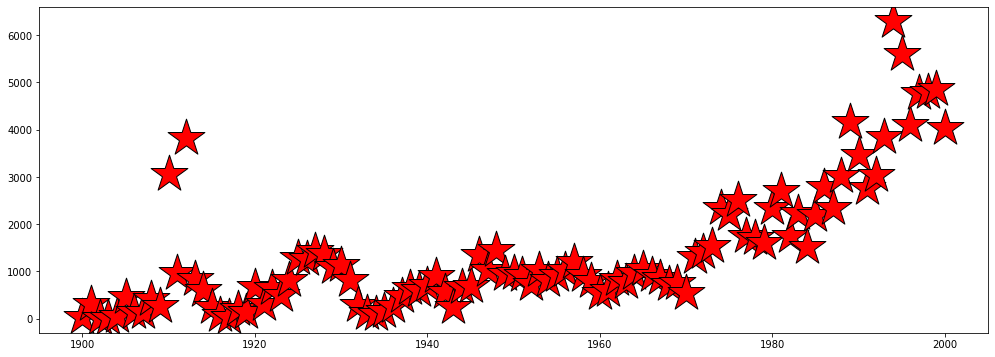

In [144]:
plt.figure(figsize=(17,6))
plt.scatter(x,y, label='No of props built', s = 1500,
            color='red',edgecolor='black', marker='*')

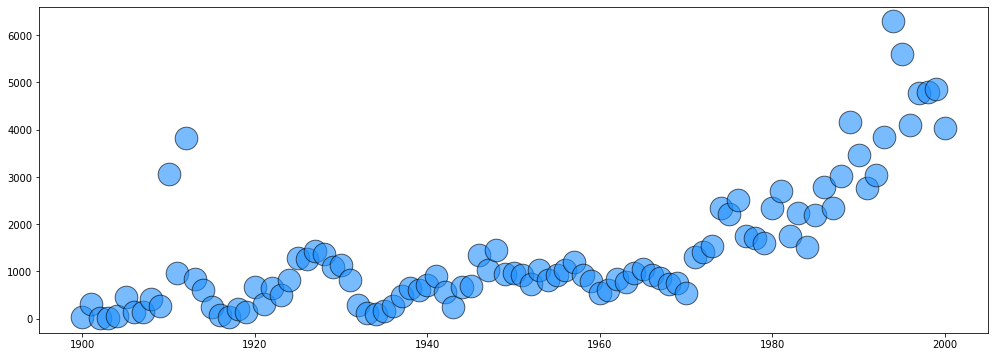

In [148]:
plt.figure(figsize=(17,6))
plt.scatter(x,y, label='No of props built', s = 2050,
            color='dodgerblue',edgecolor='black', 
            alpha=0.6,
            marker='.')

# read more at
https://medium.com/sfu-cspmp/advanced-visualization-for-data-scientists-with-matplotlib-15c28863c41c

In [151]:
print(df.head(5))

               ZONE_CATEGORY  NO_OF_PROPS  PERC_OF_PROP
0                 Commercial        17869      8.803591
1  Comprehensive Development        67550     33.280125
2              Historic Area         2457      1.210500
3                 Industrial         1239      0.610423
4           Light Industrial         3297      1.624346


In [152]:
df.head()

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
0,Commercial,17869,8.803591
1,Comprehensive Development,67550,33.280125
2,Historic Area,2457,1.210500
3,Industrial,1239,0.610423
4,Light Industrial,3297,1.624346
